### Australia - Real Estate Prediction
- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing

## Problem Statement.

The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house
- How well those variables describe the price of a house.
- Optimal value of Lambda

In [1]:
#Import the Libararies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### Collecting the data

In [2]:
#Read the Dataset
house = pd.read_csv("train.csv")

In [3]:
# display the Dataframe
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

## Exploratory data analysis

In [4]:
# Checking the shapre of the dataframe
house.shape

(1460, 81)

In [5]:
# Checking the inforamtion and the data types and to see if there are any missing values.
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Checking the basic statistics.
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

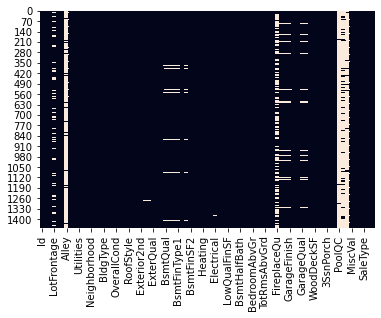

In [7]:
# Heat Map to find missing values.
sns.heatmap(house.isnull(), cbar=False)

In [8]:
# Checking missing values.
house.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

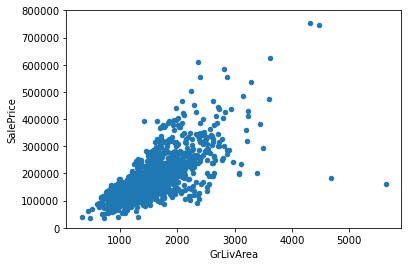

In [9]:
# PLotting graph to see if "GrLivArea" is linear with Sales Price, so that Linear regression can be applied.
var = 'GrLivArea' 
data = pd.concat([house['SalePrice'], house[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

As it is visible from the plot that this variabe is linear with the target variable SalePrice

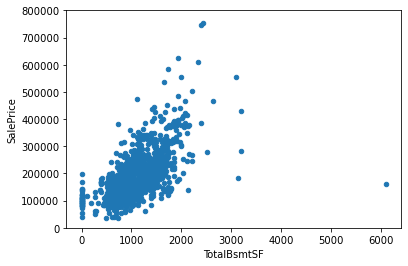

In [10]:
# PLotting graph to see if "GrLivArea" is linear with Sales Price, so that Linear regression can be applied.
var = 'TotalBsmtSF' 
data = pd.concat([house['SalePrice'], house[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

As it is visible from the plot that this variabe is linear with the target variable SalePrice

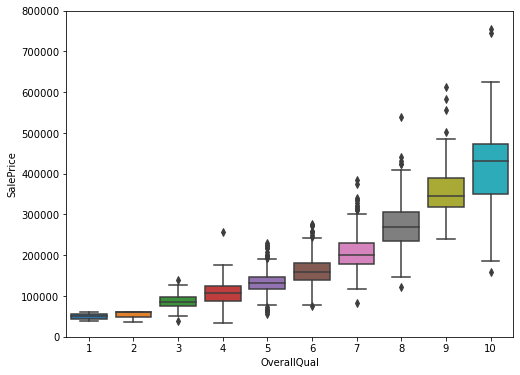

In [11]:
# Outlier Analysis
#box plot OverallQual vs salesprice

var = 'OverallQual' # OverallQual
data = pd.concat([house['SalePrice'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);

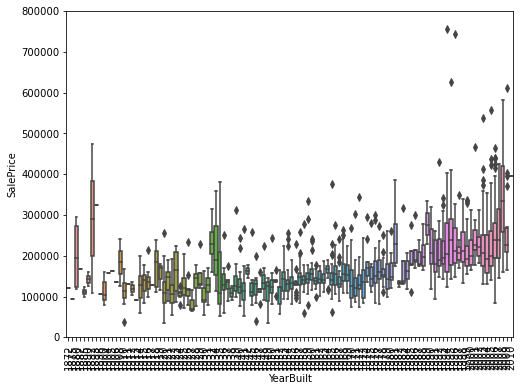

In [12]:
# Outlier Analysis
#box plot overallqual vs salesprice

var = 'YearBuilt' # YearBulit
data = pd.concat([house['SalePrice'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [13]:
house['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [14]:
#checking shapre before performing operation
house.shape

(1460, 81)

In [15]:
#Create a new column as age and remove "yearBuilt", so that we get to know the age of the house which is more relevant than the year.
house['Ageofhouse'] =2021 - house['YearBuilt']
house = house.drop(['Id','YearBuilt'], axis=1)

In [16]:
# Copying the house data fram to housing_data
housing_data = house.copy()

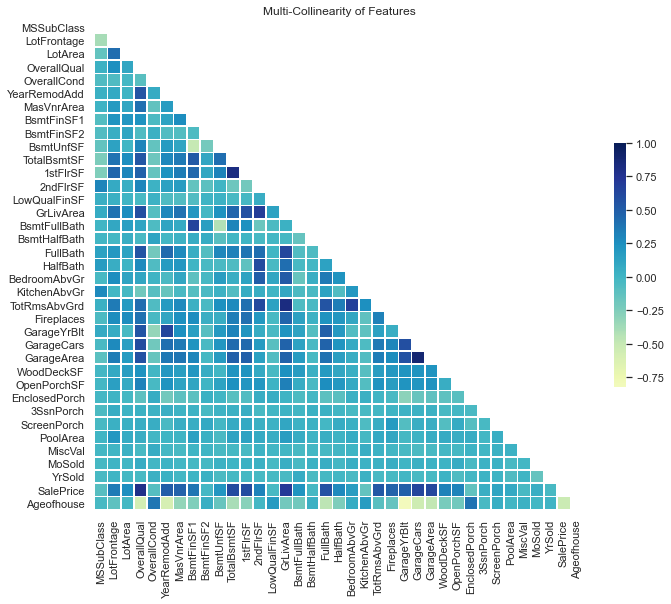

In [17]:
# PLot a HeatMap to identify colinearity of features.
sns.set(style="white")
# Create a covariance matrix
corr = housing_data.corr()
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap="YlGnBu",vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features')
plt.show()

In [18]:
# Deleting highly co-related values what was observed from heatmap.
house.drop(['BsmtUnfSF','BsmtFinSF1','YearRemodAdd','LotFrontage','1stFlrSF','GarageArea','GarageYrBlt'], axis=1)

MSSubClass MSZoning  LotArea Street Alley LotShape LandContour  \
0             60       RL     8450   Pave   NaN      Reg         Lvl   
1             20       RL     9600   Pave   NaN      Reg         Lvl   
2             60       RL    11250   Pave   NaN      IR1         Lvl   
3             70       RL     9550   Pave   NaN      IR1         Lvl   
4             60       RL    14260   Pave   NaN      IR1         Lvl   
...          ...      ...      ...    ...   ...      ...         ...   
1455          60       RL     7917   Pave   NaN      Reg         Lvl   
1456          20       RL    13175   Pave   NaN      Reg         Lvl   
1457          70       RL     9042   Pave   NaN      Reg         Lvl   
1458          20       RL     9717   Pave   NaN      Reg         Lvl   
1459          20       RL     9937   Pave   NaN      Reg         Lvl   

     Utilities LotConfig LandSlope  ... PoolQC  Fence MiscFeature MiscVal  \
0       AllPub    Inside       Gtl  ...    NaN    NaN         NaN       0   
1       AllPub       FR2       Gtl  ...    NaN    NaN         NaN       0   
2       AllPub    Inside       Gtl  ...    NaN    NaN         NaN       0   
3       AllPub    Corner       Gtl  ...    NaN    NaN         NaN       0   
4       AllPub       FR2       Gtl  ...    NaN    NaN         NaN       0   
...        ...       ...       ...  ...    ...    ...         ...     ...   
1455    AllPub    Inside       Gtl  ...    NaN    NaN         NaN       0   
1456    AllPub    Inside       Gtl  ...    NaN  MnPrv         NaN       0   
1457    AllPub    Inside       Gtl  ...    NaN  GdPrv        Shed    2500   
1458    AllPub    Inside       Gtl  ...    NaN    NaN         NaN       0   
1459    AllPub    Inside       Gtl  ...    NaN    NaN         NaN       0   

     MoSold  YrSold  SaleType SaleCondition SalePrice Ageofhouse  
0         2    2008        WD        Normal    208500         18  
1         5    2007        WD        Normal    181500         45  
2         9    2008        WD        Normal    223500         20  
3         2    2006        WD       Abnorml    140000        106  
4        12    2008        WD        Normal    250000         21  
...     ...     ...       ...           ...       ...        ...  
1455      8    2007        WD        Normal    175000         22  
1456      2    2010        WD        Normal    210000         43  
1457      5    2010        WD        Normal    266500         80  
1458      4    2010        WD        Normal    142125         71  
1459      6    2008        WD        Normal    147500         56  

[1460 rows x 73 columns]

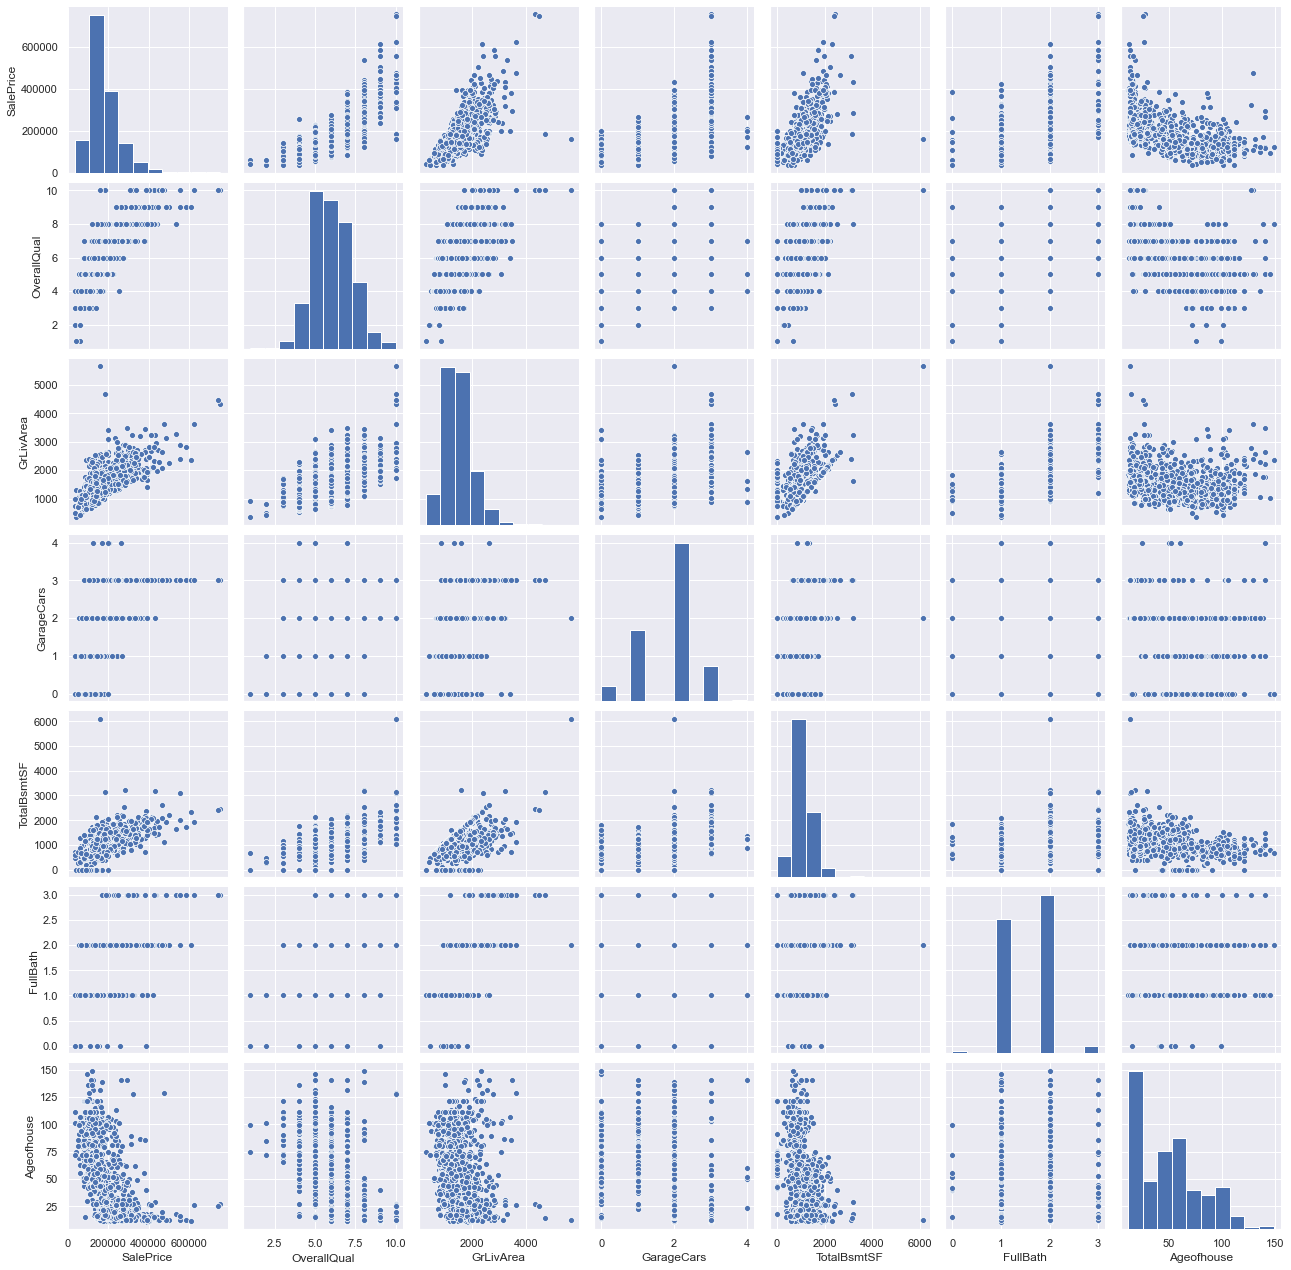

In [19]:
# scatterplot to check how the below variables are aligned.
# SalePrice, OverallQual, GrLivArea, GarageCars, TotalBasmtSF, FullBath, YearBuilt

sns.set()
cols=['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'Ageofhouse']
sns.pairplot(house[cols],size=2.5)
plt.show();

## Missing Data

In [20]:
# identify the missing data.
# Created a dataframe to store the total and percentage
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum())/(house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data

Total   Percent
PoolQC        1453  0.995205
MiscFeature   1406  0.963014
Alley         1369  0.937671
Fence         1179  0.807534
FireplaceQu    690  0.472603
...            ...       ...
1stFlrSF         0  0.000000
SalePrice        0  0.000000
HeatingQC        0  0.000000
Heating          0  0.000000
MSSubClass       0  0.000000

[80 rows x 2 columns]

In [21]:
# As few frature values are having "NA" but they have meaning like "No Pool" and other values.
null_has_meaning = missing_data.index
null_has_meaning

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical', 'LotConfig', 'LandSlope',
       'BsmtFinSF1', 'MSZoning', 'Foundation', 'ExterCond', 'ExterQual',
       'Exterior2nd', 'Exterior1st', 'RoofMatl', 'RoofStyle', 'YearRemodAdd',
       'OverallCond', 'OverallQual', 'HouseStyle', 'LotArea', 'Street',
       'BsmtFinSF2', 'LotShape', 'BldgType', 'Condition2', 'LandContour',
       'Utilities', 'Condition1', 'Neighborhood', 'Ageofhouse', 'CentralAir',
       'BsmtUnfSF', '3SsnPorch', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
       'TotalBsmtSF', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'Fireplaces', 'Functional', 'TotRmsAbvGrd',
       'KitchenQual', '

In [22]:
# Replacing NA which is a meaningful info by None

for i in null_has_meaning:
    house[i].fillna("None", inplace=True)

In [23]:
# Checkking if the all null values are addressed.
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum())/(house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data

Total  Percent
Ageofhouse       0      0.0
SalePrice        0      0.0
Exterior1st      0      0.0
Exterior2nd      0      0.0
MasVnrType       0      0.0
...            ...      ...
Fireplaces       0      0.0
FireplaceQu      0      0.0
GarageType       0      0.0
GarageYrBlt      0      0.0
MSSubClass       0      0.0

[80 rows x 2 columns]

In [24]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotFrontage    1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   Alley          1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [25]:
# Created a numnerical features 
house_numerical = house.select_dtypes(include=['float64','int64'])
house_numerical

MSSubClass  LotArea  OverallQual  OverallCond  YearRemodAdd  BsmtFinSF1  \
0             60     8450            7            5          2003         706   
1             20     9600            6            8          1976         978   
2             60    11250            7            5          2002         486   
3             70     9550            7            5          1970         216   
4             60    14260            8            5          2000         655   
...          ...      ...          ...          ...           ...         ...   
1455          60     7917            6            5          2000           0   
1456          20    13175            6            6          1988         790   
1457          70     9042            7            9          2006         275   
1458          20     9717            5            6          1996          49   
1459          20     9937            5            6          1965         830   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  OpenPorchSF  \
0              0        150          856       856  ...           61   
1              0        284         1262      1262  ...            0   
2              0        434          920       920  ...           42   
3              0        540          756       961  ...           35   
4              0        490         1145      1145  ...           84   
...          ...        ...          ...       ...  ...          ...   
1455           0        953          953       953  ...           40   
1456         163        589         1542      2073  ...            0   
1457           0        877         1152      1188  ...           60   
1458        1029          0         1078      1078  ...            0   
1459         290        136         1256      1256  ...           68   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0                 0          0            0         0        0       2   
1                 0          0            0         0        0       5   
2                 0          0            0         0        0       9   
3               272          0            0         0        0       2   
4                 0          0            0         0        0      12   
...             ...        ...          ...       ...      ...     ...   
1455              0          0            0         0        0       8   
1456              0          0            0         0        0       2   
1457              0          0            0         0     2500       5   
1458            112          0            0         0        0       4   
1459              0          0            0         0        0       6   

      YrSold  SalePrice  Ageofhouse  
0       2008     208500          18  
1       2007     181500          45  
2       2008     223500          20  
3       2006     140000         106  
4       2008     250000          21  
...      ...        ...         ...  
1455    2007     175000          22  
1456    2010     210000          43  
1457    2010     266500          80  
1458    2010     142125          71  
1459    2008     147500          56  

[1460 rows x 34 columns]

In [26]:
# Created a new df that contains only Categorical features
house_categorical = house.select_dtypes(exclude=['float64','int64','datetime64'])
house_categorical

MSZoning LotFrontage Street Alley LotShape LandContour Utilities  \
0          RL          65   Pave  None      Reg         Lvl    AllPub   
1          RL          80   Pave  None      Reg         Lvl    AllPub   
2          RL          68   Pave  None      IR1         Lvl    AllPub   
3          RL          60   Pave  None      IR1         Lvl    AllPub   
4          RL          84   Pave  None      IR1         Lvl    AllPub   
...       ...         ...    ...   ...      ...         ...       ...   
1455       RL          62   Pave  None      Reg         Lvl    AllPub   
1456       RL          85   Pave  None      Reg         Lvl    AllPub   
1457       RL          66   Pave  None      Reg         Lvl    AllPub   
1458       RL          68   Pave  None      Reg         Lvl    AllPub   
1459       RL          75   Pave  None      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... GarageYrBlt GarageFinish  \
0       Inside       Gtl      CollgCr  ...        2003          RFn   
1          FR2       Gtl      Veenker  ...        1976          RFn   
2       Inside       Gtl      CollgCr  ...        2001          RFn   
3       Corner       Gtl      Crawfor  ...        1998          Unf   
4          FR2       Gtl      NoRidge  ...        2000          RFn   
...        ...       ...          ...  ...         ...          ...   
1455    Inside       Gtl      Gilbert  ...        1999          RFn   
1456    Inside       Gtl       NWAmes  ...        1978          Unf   
1457    Inside       Gtl      Crawfor  ...        1941          RFn   
1458    Inside       Gtl        NAmes  ...        1950          Unf   
1459    Inside       Gtl      Edwards  ...        1965          Fin   

     GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
0            TA         TA          Y   None   None        None       WD   
1            TA         TA          Y   None   None        None       WD   
2            TA         TA          Y   None   None        None       WD   
3            TA         TA          Y   None   None        None       WD   
4            TA         TA          Y   None   None        None       WD   
...         ...        ...        ...    ...    ...         ...      ...   
1455         TA         TA          Y   None   None        None       WD   
1456         TA         TA          Y   None  MnPrv        None       WD   
1457         TA         TA          Y   None  GdPrv        Shed       WD   
1458         TA         TA          Y   None   None        None       WD   
1459         TA         TA          Y   None   None        None       WD   

     SaleCondition  
0           Normal  
1           Normal  
2           Normal  
3          Abnorml  
4           Normal  
...            ...  
1455        Normal  
1456        Normal  
1457        Normal  
1458        Normal  
1459        Normal  

[1460 rows x 46 columns]

## Data preparation

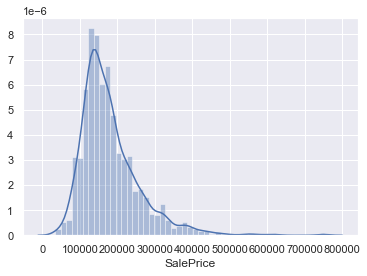

In [27]:
# Cheking the plot for target variable/independent variable "SalesPrice"
sns.distplot(house['SalePrice']);

In [28]:
# Skewness
house['SalePrice'].skew()

1.8828757597682129

In [29]:
# Fromaule to check skewness
house['SalePrice'].mean() - house['SalePrice'].median()

17921.19589041095

- This is positively Skewed, 
- Skewness deals with the amount and direction of skew, i,.e. departure from horizontal symmetry.
- Since the value is positive, we can say that it is positively skewed. 
- Skewness is calculated by subtracting the value of median from mean. If the value is +ve then Positively skewed.
-  Since the skewness is greater than 1 , we can say that it is highly skewed.


In [30]:
# Kurtosis
house['SalePrice'].kurt()

6.536281860064529



- Kurtosis tells you the height and sharpness of the central peak, relative to that of a standard bell curve.
- It tells us how falt or peak is the distribution.

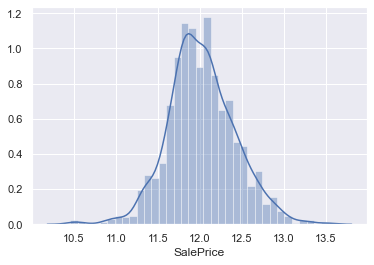

In [31]:
# As the curve of Sales is not Normal, We will apply Log Transformation
sns.distplot(np.log(house['SalePrice']));

###### By Applying Log Transforamtion, we are able to make the Normal Curve, making it comaptible for the  machine Learning Model.

In [32]:
# Applying Log transforamtion on 'SalePrice' and created a new variable 'TransformedPrice'
house['TransformedPrice'] = np.log(house['SalePrice'])

In [33]:
# Dropping "SalePrice" as a new feature is dervied from it
house = house.drop(['SalePrice'], axis=1)

In [34]:
# Checking Kurtosis
house['TransformedPrice'].kurt()

0.8095319958036296

In [35]:
# Checking Skewness
house['TransformedPrice'].skew()

0.12133506220520406

- As you can see that now both skewness and Kurtosis is within the range of -1 to 1, while for kurtosis range of +/- 3 is acceptable for a normal curve.

In [36]:
house_categorical.shape

(1460, 46)

In [37]:
# Categorical value encoding 

for i in house_categorical:
    feature_set = set(house[i])
    for j in feature_set:
        feature_list = list(feature_set)
        house.loc[house[i] == j,i] = feature_list.index(j)

In [38]:
house.head()

MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape LandContour  \
0          60        1          36     8450      1     2        0           2   
1          20        1          51     9600      1     2        0           2   
2          60        1          39    11250      1     2        2           2   
3          70        1          31     9550      1     2        2           2   
4          60        1          55    14260      1     2        2           2   

  Utilities LotConfig  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         1         0  ...      2     4           2       0      2   2008   
1         1         4  ...      2     4           2       0      5   2007   
2         1         0  ...      2     4           2       0      9   2008   
3         1         3  ...      2     4           2       0      2   2006   
4         1         4  ...      2     4           2       0     12   2008   

   SaleType  SaleCondition  Ageofhouse TransformedPrice  
0         0              0          18        12.247694  
1         0              0          45        12.109011  
2         0              0          20        12.317167  
3         0              1         106        11.849398  
4         0              0          21        12.429216  

[5 rows x 80 columns]

In [39]:
# To displau all the columns
pd.set_option('display.max_columns', None)

In [40]:
house.head(100)

MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0           60        1          36     8450      1     2        0   
1           20        1          51     9600      1     2        0   
2           60        1          39    11250      1     2        2   
3           70        1          31     9550      1     2        2   
4           60        1          55    14260      1     2        2   
..         ...      ...         ...      ...    ...   ...      ...   
95          60        1         110     9765      1     2        3   
96          20        1          49    10264      1     2        2   
97          20        1          44    10921      1     2        0   
98          30        1          56    10625      1     2        0   
99          20        1          48     9320      1     2        2   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            2         1         0         0           16          4   
1            2         1         4         0           19          0   
2            2         1         0         0           16          4   
3            2         1         3         0            1          4   
4            2         1         4         0           21          4   
..         ...       ...       ...       ...          ...        ...   
95           2         1         3         0           24          4   
96           2         1         0         0           16          4   
97           1         1         0         0           13          4   
98           2         1         3         0           13          4   
99           2         1         0         0           17          4   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearRemodAdd  \
0           4        1          6            7            5          2003   
1           4        1          7            6            8          1976   
2           4        1          6            7            5          2002   
3           4        1          6            7            5          1970   
4           4        1          6            8            5          2000   
..        ...      ...        ...          ...          ...           ...   
95          4        1          6            6            8          1993   
96          4        1          7            7            5          1999   
97          4        1          7            4            5          1965   
98          4        1          7            5            5          1950   
99          4        1          7            4            5          1959   

   RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType MasVnrArea ExterQual  \
0          5        6           0           0          1        128         3   
1          5        6           4           6          2          0         2   
2          5        6           0           0          1        104         3   
3          5        6          10          12          2          0         2   
4          5        6           0           0          1        221         3   
..       ...      ...         ...         ...        ...        ...       ...   
95         5        6           0           0          1         35         0   
96         5        6           0           0          1        121         3   
97         2        6          11          13          1         22         2   
98         5        6          10           9          2          0         2   
99         5        6           3          11          2          0         2   

   ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0          2          4        4        1            4            2   
1          2          5        4        1            3            4   
2          2          4        4        1            1            2   
3          2          0        1        4            4            4   
4          2          4        4        1    

In [41]:
# Checking unique values
house.Street.unique()

array([1, 0], dtype=object)

In [42]:
house.shape

(1460, 80)

### Model Building


In [43]:
# Segragarting the model on X and Y axis. where Y is the target/independednt varaible
X = house.drop(['TransformedPrice'], axis=1).values
y = house['TransformedPrice'].values

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [45]:
# Importing scalers to apply any of the scaler,i.e. Standard and MinMax
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [46]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'O

In [47]:
#'fit_transform' can be performed on 2D arrays only. So reshape of 'X_train_scaled' and 'y_train_scaled' data in order to perform the standardisation.

X_train_scaled = X_train.reshape(-1,1)
y_train_scaled = y_train.reshape(-1,1)

# X_test_scaled = X_train.reshape(-1,1)
# y_test_scaled = y_train.reshape(-1,1)

In [48]:
X_train_scaled

array([[30],
       [1],
       [38],
       ...,
       [0],
       [0],
       [111]], dtype=object)

In [49]:
# Create a scaler object using StandardScaler()
scaler = StandardScaler()
#'Fit' and transform the train set; and transform using the fit on the test set later
X_train_scaled = scaler.fit_transform(X_train_scaled)
y_train_scaled = scaler.fit_transform(y_train_scaled)


In [50]:
print("mean and sd for X_train_scaled:", np.mean(X_train_scaled),'-' ,np.std(X_train_scaled))
print("mean and sd for y_train_scaled:", np.mean(y_train_scaled),'-' ,np.std(y_train_scaled))

mean and sd for X_train_scaled: -9.073494809418704e-18 - 0.9999999999999999
mean and sd for y_train_scaled: -3.5005190606006893e-15 - 1.0


In [51]:
# list of alphas
params = {
    'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0,50.0,100.0,500.0,1000.0]
}
print(params)

{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50.0, 100.0, 500.0, 1000.0]}


In [52]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [53]:
# Lasso
# Apllying K-Fold where K is selected as 5

lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv= folds,
                       return_train_score=True,
                       verbose= 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
# Storing the results in Dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.008977      0.005046         0.000798    3.988278e-04      0.0001   
1       0.005983      0.000893         0.000998    5.560829e-07       0.001   
2       0.004189      0.001162         0.000806    4.032550e-04        0.01   
3       0.017961      0.005941         0.001595    7.994213e-04        0.05   
4       0.015365      0.002852         0.000798    3.990173e-04         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.097183          -0.107215          -0.104091   
1   {'alpha': 0.001}          -0.092922          -0.107181          -0.103968   
2    {'alpha': 0.01}          -0.095711          -0.110657          -0.110332   
3    {'alpha': 0.05}          -0.103822          -0.120562          -0.116550   
4     {'alpha': 0.1}          -0.110761          -0.127256          -0.124294   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.087037          -0.099676        -0.099041        0.006932   
1          -0.085185          -0.098983        -0.097648        0.007877   
2          -0.088407          -0.096873        -0.100396        0.008742   
3          -0.102937          -0.102950        -0.109364        0.007618   
4          -0.111412          -0.112350        -0.117215        0.007070   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.086233           -0.084473   
1                1           -0.087587           -0.084353   
2                3           -0.098028           -0.087231   
3                4           -0.107463           -0.099733   
4                7           -0.116362           -0.105411   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.080252           -0.090529           -0.088735   
1           -0.081217           -0.090730           -0.089335   
2           -0.091117           -0.098941           -0.096600   
3           -0.103411           -0.108248           -0.108067   
4           -0.110839           -0.116430           -0.116912   

   mean_train_score  std_train_score  
0         -0.086044         0.003561  
1         -0.086644         0.003450  
2         -0.094384         0.004490  
3         -0.105384         0.003333  
4         -0.113191         0.004482

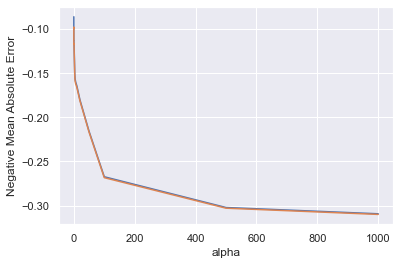

In [55]:
# Plot mean test and train scores against alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# Plotting

plt.plot(cv_results['param_alpha'] , cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'] , cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
# Give title
# Give legend
plt.show();

In [56]:
# From the above graph it is evident that the alpha value is 500, where it is kind of standardized.
alpha = 500

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=500)

In [68]:
lasso.coef_

array([-0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  4.85411264e-06,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [71]:
betas_laso = pd.DataFrame(index=list(house.drop(['TransformedPrice'], axis=1)), 
                     columns = [ 'Lasso'])

betas_laso['Lasso'] = lasso.coef_ # Lasso Regression
# top 5 variables
betas_laso.sort_values(by = ['Lasso'], ascending = False).head()

Lasso
LotArea       0.000005
MSSubClass   -0.000000
KitchenAbvGr -0.000000
GarageYrBlt   0.000000
GarageType    0.000000

## Ridge Regreesion

In [59]:
# Ridge

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv= folds,
                       return_train_score=True,
                       verbose= 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.8s finished


GridSearchCV(cv=5, estimator=Lasso(alpha=500),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [60]:
cv_ridge_results = pd.DataFrame(model_cv.cv_results_)
cv_ridge_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.011967      0.001092         0.001795        0.000746      0.0001   
1       0.007380      0.002054         0.000798        0.000399       0.001   
2       0.006583      0.000796         0.001197        0.000402        0.01   
3       0.023537      0.008383         0.001596        0.000489        0.05   
4       0.018053      0.002828         0.001196        0.000399         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.097183          -0.107215          -0.104091   
1   {'alpha': 0.001}          -0.092922          -0.107181          -0.103968   
2    {'alpha': 0.01}          -0.095711          -0.110657          -0.110332   
3    {'alpha': 0.05}          -0.103822          -0.120562          -0.116550   
4     {'alpha': 0.1}          -0.110761          -0.127256          -0.124294   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.087037          -0.099676        -0.099041        0.006932   
1          -0.085185          -0.098983        -0.097648        0.007877   
2          -0.088407          -0.096873        -0.100396        0.008742   
3          -0.102937          -0.102950        -0.109364        0.007618   
4          -0.111412          -0.112350        -0.117215        0.007070   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.086233           -0.084473   
1                1           -0.087587           -0.084353   
2                3           -0.098028           -0.087231   
3                4           -0.107463           -0.099733   
4                7           -0.116362           -0.105411   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.080252           -0.090529           -0.088735   
1           -0.081217           -0.090730           -0.089335   
2           -0.091117           -0.098941           -0.096600   
3           -0.103411           -0.108248           -0.108067   
4           -0.110839           -0.116430           -0.116912   

   mean_train_score  std_train_score  
0         -0.086044         0.003561  
1         -0.086644         0.003450  
2         -0.094384         0.004490  
3         -0.105384         0.003333  
4         -0.113191         0.004482

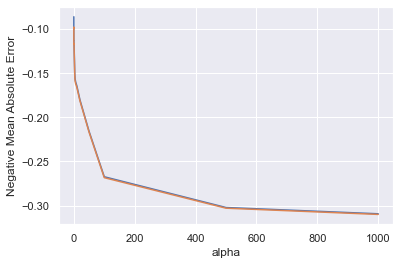

In [61]:
# Plot mean test and train scores against alpha

cv_ridge_results['param_alpha'] = cv_ridge_results['param_alpha'].astype('float32')

# Plotting

plt.plot(cv_ridge_results['param_alpha'] , cv_ridge_results['mean_train_score'])
plt.plot(cv_ridge_results['param_alpha'] , cv_ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
# Give title
# Give legend
plt.show();

In [62]:
i = 500
ridge = Ridge(alpha = i)
ridge.fit(X_train, y_train)

Ridge(alpha=500)

In [63]:
ridge.coef_

array([-4.86362024e-04, -7.39965921e-03,  3.41770672e-04,  1.44503496e-06,
        1.51621654e-03,  7.66282371e-04,  3.34353930e-03, -1.17250516e-02,
        2.13280993e-04, -2.65455002e-03,  2.91262077e-03,  1.24951578e-04,
        1.09146382e-02, -3.16474584e-03,  2.03745591e-03, -2.80780470e-03,
        5.03323292e-02,  2.69364561e-02,  2.50297989e-03, -3.80618473e-03,
       -5.65395208e-03, -2.61205408e-03,  5.17806005e-05, -1.76098865e-03,
        4.95416518e-05,  7.17118827e-03, -3.40682244e-03, -3.02579075e-03,
       -6.44808818e-03, -2.16290475e-03, -2.93836392e-03, -3.91261620e-03,
        3.78987335e-05, -3.94569733e-03,  2.44112968e-05, -5.48130336e-06,
        5.68287268e-05,  4.91294579e-04, -4.63004420e-03, -6.75457956e-03,
        5.08471879e-03,  7.00986694e-05,  6.79965974e-05,  4.11754449e-05,
        1.79270712e-04,  1.41236642e-02,  5.73649492e-04,  7.57536873e-03,
        2.75204123e-03,  1.97768788e-03, -4.84827017e-03, -5.55621812e-03,
        4.67885087e-03,  

In [65]:
betas_ridge= pd.DataFrame(index=list(house.drop(['TransformedPrice'], axis=1)), 
                     columns = [ 'Ridge'])

betas_ridge['Ridge'] = ridge.coef_ # Ridge Regression
# Top 5 variables.
betas_ridge.sort_values(by = ['Ridge'], ascending = False).head()

Ridge
OverallQual   0.050332
OverallCond   0.026936
Fireplaces    0.020855
BsmtFullBath  0.014124
GarageCars    0.011819